In [19]:
#Import the libraries

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.svm import SVR

In [20]:
dataset_train = pd.read_csv("/home/tintin/Study/Data-science/Statistical-machine-learning/Learn-support-vector-regression/Datasets/Position_SalariesTrain.csv")
dataset_test = pd.read_csv("/home/tintin/Study/Data-science/Statistical-machine-learning/Learn-support-vector-regression/Datasets/Position_SalariesTest.csv")
dataset_train

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Manager,4,80000
3,Region Manager,6,150000
4,Partner,7,200000
5,Senior Partner,8,300000
6,CEO,10,1000000


In [21]:
X_train = dataset_train.iloc[:,1:-1].values
Y_train = dataset_train.iloc[:,-1].values.reshape(-1,1)
X_test = dataset_test.iloc[:,1:-1].values
Y_test = dataset_test.iloc[:,-1].values.reshape(-1,1)

In [22]:
SC_X = StandardScaler()
SC_Y = StandardScaler()
X_trans = SC_X.fit_transform(X_train)
Y_trans = SC_Y.fit_transform(Y_train)
svr = SVR(kernel = "rbf")
svr.fit(X_trans, Y_trans)

/home/tintin/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/tintin/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/tintin/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/tintin/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [24]:
def predict(model, X, SC_X, SC_Y):
    X_trans = SC_X.transform(X)
    Y_trans_pred = model.predict(X_trans)
    Y_pred = SC_Y.inverse_transform(Y_trans_pred)
    return Y_pred
Y_pred = predict(svr, X_train, SC_X, SC_Y)

/home/tintin/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


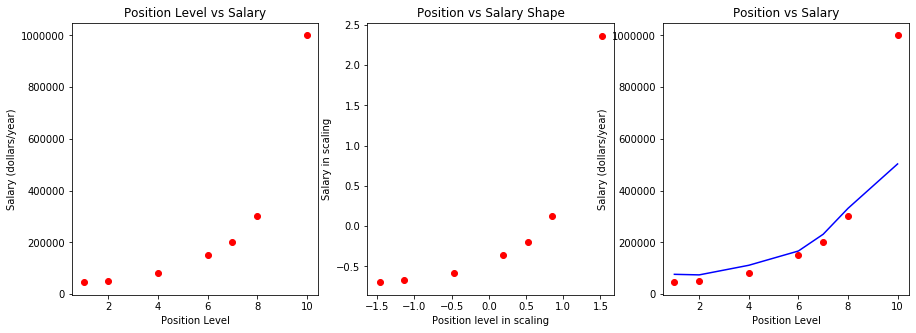

In [25]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(X_train, Y_train, color = "red")
plt.title("Position Level vs Salary")
plt.xlabel("Position Level")
plt.ylabel("Salary (dollars/year)")

plt.subplot(1,3,2)
plt.scatter(X_trans, Y_trans, color = "red")
plt.title("Position vs Salary Shape")
plt.xlabel("Position level in scaling")
plt.ylabel("Salary in scaling")

plt.subplot(1,3,3)
plt.scatter(X_train, Y_train, color = "red")
plt.plot(X_train, Y_pred, color = "blue")
plt.title("Position vs Salary")
plt.xlabel("Position Level")
plt.ylabel("Salary (dollars/year)")

plt.show()


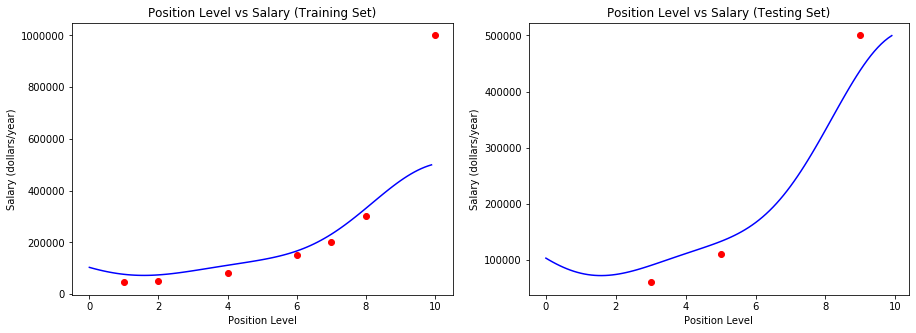

In [34]:
X_dummy_train = np.arange(0, 10, 0.1).reshape(-1, 1)
Y_dummy_train_pred = predict(svr, X_dummy_train, SC_X, SC_Y)

X_dummy_test = np.arange(0, 10, 0.1).reshape(-1, 1)
Y_dummy_test_pred = predict(svr, X_dummy_test, SC_X, SC_Y)

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.scatter(X_train, Y_train, color = "red")
plt.plot(X_dummy_train, Y_dummy_train_pred, color = "blue")
plt.title("Position Level vs Salary (Training Set)")
plt.xlabel("Position Level")
plt.ylabel("Salary (dollars/year)")

plt.subplot(1,2,2)
plt.scatter(X_test, Y_test, color = "red")
plt.plot(X_dummy_test, Y_dummy_test_pred, color = "blue")
plt.title("Position Level vs Salary (Testing Set)")
plt.xlabel("Position Level")
plt.ylabel("Salary (dollars/year)")

plt.savefig("TrainTest.png",dpi=120)
plt.show()

In [33]:
Y_test_pred = predict(svr, X_test, SC_X, SC_Y)
print(r2_score(Y_train,Y_pred))
print(r2_score(Y_test,Y_test_pred))

0.6338239329592488
0.9545339690278688


/home/tintin/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [27]:
def compare(i_example, X, Y):
    x = X[i_example : i_example + 1]
    y = Y[i_example]
    y_pred = predict(svr, x, SC_X, SC_Y)
    print(x, y, y_pred)

In [28]:
for i in range(len(X_test)):
    compare(i,X_test,Y_test)

[[9]] [500000] [438051.50571149]
[[3]] [60000] [90226.13294714]
[[5]] [110000] [132931.54168274]


/home/tintin/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/tintin/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/tintin/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
